In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/Documents/bithumb_analysis/include/2018-05-btc-krw.csv")

In [3]:
# identifying column type 
df.dtypes

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
# creating 'price - side' connection - price가 같은것 끼리 묶는다.
side_price = df['side'].groupby(df['price'])

In [6]:
# price 별 side의 평균
side_price.mean()

price
7853000    -1.405690e+05
7858000     1.982837e+05
7859000    -1.206985e+07
7862000     1.392675e+06
7864000    -6.849545e+05
                ...     
10947000    1.970500e+04
10948000    4.379200e+06
10949000    1.780308e+06
10951000   -8.343020e+06
10953000    2.173622e+06
Name: amount, Length: 2749, dtype: float64

In [7]:
# 가격을 10 구간 으로 구간 나눔
factor_price=pd.cut(df.price,10)

In [8]:
factor_price

0        (10023000.0, 10333000.0]
1        (10023000.0, 10333000.0]
2        (10023000.0, 10333000.0]
3        (10023000.0, 10333000.0]
4        (10023000.0, 10333000.0]
                   ...           
23290      (8163000.0, 8473000.0]
23291      (8163000.0, 8473000.0]
23292      (8163000.0, 8473000.0]
23293      (8163000.0, 8473000.0]
23294      (8163000.0, 8473000.0]
Name: price, Length: 23295, dtype: category
Categories (10, interval[float64]): [(7849900.0, 8163000.0] < (8163000.0, 8473000.0] < (8473000.0, 8783000.0] < (8783000.0, 9093000.0] ... (9713000.0, 10023000.0] < (10023000.0, 10333000.0] < (10333000.0, 10643000.0] < (10643000.0, 10953000.0]]

In [9]:
group_side_by_priceGroup = df['side'].groupby(factor_price)

In [10]:
group_side_by_priceGroup.size()

price
(7849900.0, 8163000.0]       865
(8163000.0, 8473000.0]      2012
(8473000.0, 8783000.0]       451
(8783000.0, 9093000.0]      1535
(9093000.0, 9403000.0]      5297
(9403000.0, 9713000.0]      3755
(9713000.0, 10023000.0]     2686
(10023000.0, 10333000.0]    2525
(10333000.0, 10643000.0]    2887
(10643000.0, 10953000.0]    1282
Name: side, dtype: int64

In [11]:
group_side_by_priceGroup.mean()

price
(7849900.0, 8163000.0]      0.594220
(8163000.0, 8473000.0]      0.594433
(8473000.0, 8783000.0]      0.600887
(8783000.0, 9093000.0]      0.698371
(9093000.0, 9403000.0]      0.643572
(9403000.0, 9713000.0]      0.662850
(9713000.0, 10023000.0]     0.618392
(10023000.0, 10333000.0]    0.624158
(10333000.0, 10643000.0]    0.648424
(10643000.0, 10953000.0]    0.630265
Name: side, dtype: float64

In [12]:
group_side_by_priceGroup.sum()

price
(7849900.0, 8163000.0]       514
(8163000.0, 8473000.0]      1196
(8473000.0, 8783000.0]       271
(8783000.0, 9093000.0]      1072
(9093000.0, 9403000.0]      3409
(9403000.0, 9713000.0]      2489
(9713000.0, 10023000.0]     1661
(10023000.0, 10333000.0]    1576
(10333000.0, 10643000.0]    1872
(10643000.0, 10953000.0]     808
Name: side, dtype: int64

In [15]:
group_side_by_priceGroup_table = [group_side_by_priceGroup.size(), group_side_by_priceGroup.mean(), group_side_by_priceGroup.sum()]
side_by_priceGroup = reduce(lambda left, right: pd.merge(left,right, on='price'), group_side_by_priceGroup_table)
side_by_priceGroup.columns = ["# of side", "mean of side", "sum of side"]

In [16]:
side_by_priceGroup

,# of side,mean of side,sum of side
price,,,
"(7849900.0, 8163000.0]",865,0.594220,514
"(8163000.0, 8473000.0]",2012,0.594433,1196
"(8473000.0, 8783000.0]",451,0.600887,271
"(8783000.0, 9093000.0]",1535,0.698371,1072
"(9093000.0, 9403000.0]",5297,0.643572,3409
"(9403000.0, 9713000.0]",3755,0.662850,2489
"(9713000.0, 10023000.0]",2686,0.618392,1661
"(10023000.0, 10333000.0]",2525,0.624158,1576
"(10333000.0, 10643000.0]",2887,0.648424,1872


In [17]:
side_by_priceGroup.to_csv("/Users/hamin/Documents/bithumb_analysis/table/side_by_price_Group.csv")

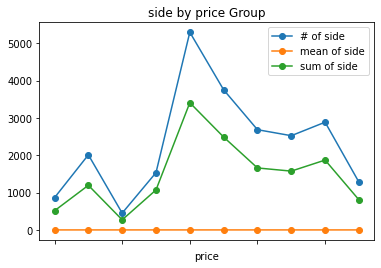

In [19]:
# priceGroup-side 간 그래프
side_by_priceGroup.plot(title='side by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/side_by_price_Group.png', dpi=300)

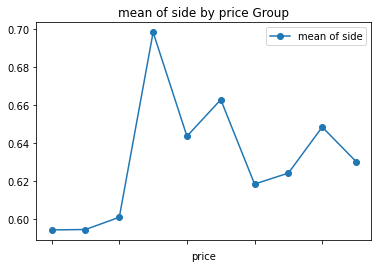

In [20]:
# priceGroup-mean of side 간 그래프 (0.5보다 크면 산 것이 더 많다는 것)
side_by_priceGroup.plot(y='mean of side',title='mean of side by price Group', marker='o')
plt.savefig('/Users/hamin/Documents/bithumb_analysis/graph/mean_of_side_by_price_Group.png', dpi=300)